# CS 6476 Project 1: Image Filtering and Hybrid Images

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


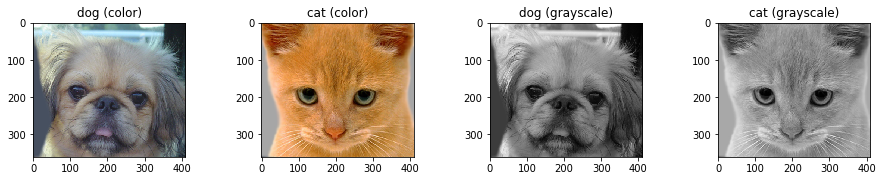

In [236]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image, im2single
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

gray_image1 = im2single(cv2.imread('../data/dog.bmp',0))
gray_image2 = im2single(cv2.imread('../data/cat.bmp',0))

fig, axs = plt.subplots(1, 4, figsize=(15, 15));
axs[0].imshow((image1*255).astype(np.uint8));
axs[0].set_title("dog (color)");
axs[1].imshow((image2*255).astype(np.uint8));
axs[1].set_title("cat (color)");
axs[2].imshow((gray_image1*255).astype(np.uint8), cmap='gray');
axs[2].set_title("dog (grayscale)");
axs[3].imshow((gray_image2*255).astype(np.uint8), cmap='gray');
axs[3].set_title("cat (grayscale)");
plt.subplots_adjust(wspace=0.5);

## Create filter

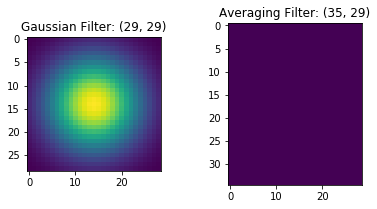

In [237]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

# Initialize filter of unequal dimensions:
box_r = 35
box_c = 29
filter2 = np.ones((box_r,box_c),np.float32)/(box_r*box_c)

fig, axs = plt.subplots(1, 2, figsize=(6, 6))
axs[0].imshow(filter);
axs[0].set_title("Gaussian Filter: "+str(filter.shape));
axs[1].imshow(filter2);
axs[1].set_title("Averaging Filter: "+str(filter2.shape));
plt.subplots_adjust(wspace=0.5)

## Apply filter to image
Both functions you need to implement in this project can be found in _student_\__code.py_. Start by implementing _my_\__imfilter_, which takes both a filter and an image, and returns the filtered image. This code block will use your _my_\__imfilter_ function to create and display a blurry version of the dog image.

color image received
filtered image generated in 3.000814199447632 seconds

color image received
filtered image generated in 2.6577866077423096 seconds

grayscale image received
filtered image generated in 0.9270007610321045 seconds



True

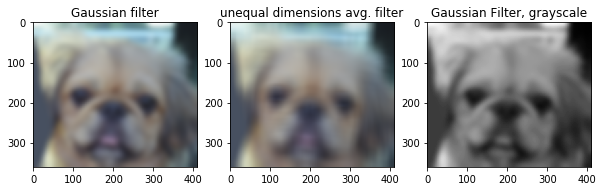

In [238]:
blurry_dog = my_imfilter(image1, filter)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].imshow((blurry_dog*255).astype(np.uint8));
axs[0].set_title("Gaussian filter")

blurry_dog2 = my_imfilter(image1, filter2)
axs[1].imshow((blurry_dog2*255).astype(np.uint8));
axs[1].set_title("unequal dimensions avg. filter");

blurry_dog3 = my_imfilter(gray_image1, filter)
axs[2].imshow((blurry_dog3*255).astype(np.uint8), cmap='gray');
axs[2].set_title("Gaussian Filter, grayscale");

save_image('../html/gaussian_filter.jpg', blurry_dog)
save_image('../html/avg_filter.jpg', blurry_dog2)
save_image('../html/gaussian_grayscale.jpg', np.expand_dims(blurry_dog3, -1))

## Create hybrid image
Next, implement _create_\__hybrid_\__image_, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another.

In [239]:
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, filter)
vis = vis_hybrid_image(hybrid_image)

color image received
filtered image generated in 2.93040132522583 seconds

color image received
filtered image generated in 2.84639048576355 seconds



## Show results

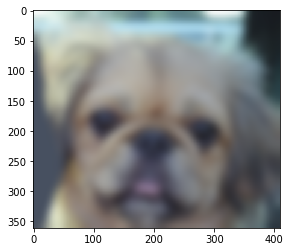

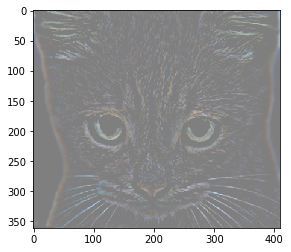

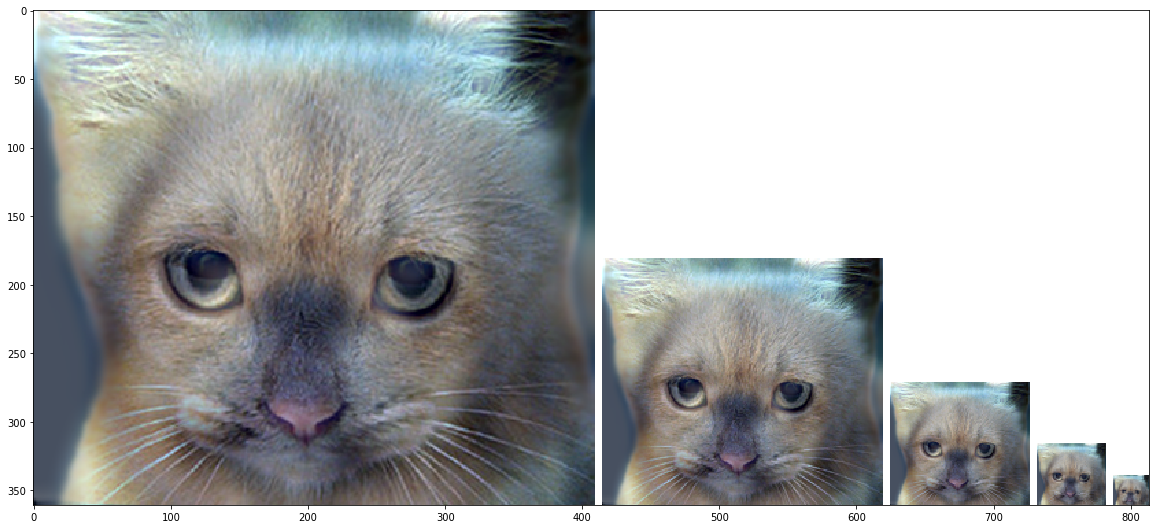

In [240]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis);


## Save results

In [241]:
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies+0.5)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)

True